

<div style="border-radius:10px; padding: 15px; font-size:120%; text-align:left">
      
<h2 align="left"><font color=green>Users' Gender Prediction and Page Recommendation</font></h2>

   
<br>

In this work we try to propose a gender prediction model for the customers visiting an e-commerce fashion shop. The ultimate goal is to assign a gender to each customer based on past browsing history and behavior and to provide web page suggestions. This enables the shop owner to dynamically customize the web page layout and offer the best possible shopping experience to customers.

To this end, we take the following steps:

- **Exploratory Data Analysis:** This step includes inspecting missing values, duplicates, and outliers besides several visual explorations on numerical and categorical values.

- **Data Preprocessing:**: This step applies required aggregations and calculations to extract shopping behavior of each customer. Here the sequence of visited pages by each customer are encoded via TFIDF and CountVector methods.

- **Users' Gender Classification:**: This stage involves several binary classifiers to recognize customers' shopping patterns and to assign a gender to each one. The popular algorithms such as Logistic Regression, Naive Bayes, Linear Discriminant Analysis, Decision Tree, Random Forest, Support Vector Machine have been trained and evaluated.

- **Page Recommendation:**: This phase tries to learn a d-dimensional vector representation for each visited page inspired by text encoding techniques. Here the sequence of pages are treated as sequence words which form an artificial corpus of sentences. Later Word2Vec is applied to the corpus of sequences to encode a vector for every single page in the dataset. The page recommendation problem is now to find the k-nearest pages via pairwise vector similarity calculation.
   

## Exploratory Data Analysis

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from collections import defaultdict
import scipy.stats as stats
from sklearn.model_selection import cross_validate
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import sensitivity_score
from sklearn.naive_bayes import GaussianNB
from scipy.stats import linregress
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import seaborn as sns
import numpy as np
import random


### Load Data

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/train.csv', encoding="ISO-8859-1")
df

,user_id,path,timestamp,gender
0,c8f04f6b-d9b6-4f4a-ad36-f56c76e79722,b3a1716e-4b53-47f9-80fd-d8eb06b10a9b,2017-01-01T00:02:09,m
1,2963e74b-aa59-40dd-a84d-c6b5330eb303,95035d58-1878-42e3-ad44-8d4a47166cbb,2017-01-01T00:03:49,f
2,2963e74b-aa59-40dd-a84d-c6b5330eb303,89e040d0-cb75-4470-95ec-7e935875dd63,2017-01-01T00:03:52,f
3,2963e74b-aa59-40dd-a84d-c6b5330eb303,f713c708-8df1-4d26-94de-7a7ad9532c1f,2017-01-01T00:03:54,f
4,2963e74b-aa59-40dd-a84d-c6b5330eb303,426fcbdf-6361-4182-8e6f-8c737da4f342,2017-01-01T00:04:10,f
...,...,...,...,...
2403274,8eaa4366-9ff7-45f0-8cd1-d6292a17f397,0cd835c2-a576-4cd3-9cec-db6ee9b1d142,2017-05-10T14:36:45,f
2403275,8eaa4366-9ff7-45f0-8cd1-d6292a17f397,6364528d-347d-42f7-82df-3c2a78c2ffcb,2017-05-10T16:38:36,f
2403276,8eaa4366-9ff7-45f0-8cd1-d6292a17f397,a6bb16ea-ec02-49d2-81b0-3ad120175c7d,2017-05-10T16:38:39,f
2403277,8eaa4366-9ff7-45f0-8cd1-d6292a17f397,aefa185d-f9d8-458f-b6d0-310ef1b8a0a8,2017-05-10T16:39:26,f


In [ ]:
df.shape

(2403279, 4)

### Check Missing Values

In [ ]:
missing_data = df.isnull().sum()

missing_data

user_id      0
path         0
timestamp    0
gender       0
dtype: int64

### Check Douplates

In [ ]:
# Finding duplicate rows (keeping all instances)
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows

,user_id,path,timestamp,gender


### Convert Time Stamp to Date

In [ ]:
df['visit_time'] = pd.to_datetime(df['timestamp'])
df['Year'] = df['visit_time'].dt.year
df['Month'] = df['visit_time'].dt.month
df['Day'] = df['visit_time'].dt.day
df['Hour'] = df['visit_time'].dt.hour
df['Day_of_week'] = df['visit_time'].dt.dayofweek

df.head(8)

,user_id,path,timestamp,gender,visit_time,Year,Month,Day,Hour,Day_of_week
0,c8f04f6b-d9b6-4f4a-ad36-f56c76e79722,b3a1716e-4b53-47f9-80fd-d8eb06b10a9b,2017-01-01T00:02:09,m,2017-01-01 00:02:09,2017,1,1,0,6
1,2963e74b-aa59-40dd-a84d-c6b5330eb303,95035d58-1878-42e3-ad44-8d4a47166cbb,2017-01-01T00:03:49,f,2017-01-01 00:03:49,2017,1,1,0,6
2,2963e74b-aa59-40dd-a84d-c6b5330eb303,89e040d0-cb75-4470-95ec-7e935875dd63,2017-01-01T00:03:52,f,2017-01-01 00:03:52,2017,1,1,0,6
3,2963e74b-aa59-40dd-a84d-c6b5330eb303,f713c708-8df1-4d26-94de-7a7ad9532c1f,2017-01-01T00:03:54,f,2017-01-01 00:03:54,2017,1,1,0,6
4,2963e74b-aa59-40dd-a84d-c6b5330eb303,426fcbdf-6361-4182-8e6f-8c737da4f342,2017-01-01T00:04:10,f,2017-01-01 00:04:10,2017,1,1,0,6
5,2963e74b-aa59-40dd-a84d-c6b5330eb303,ae0f17bd-7d3e-4008-8cda-d002c854c029,2017-01-01T00:04:22,f,2017-01-01 00:04:22,2017,1,1,0,6
6,7f84af98-6319-4b39-aba8-c1bf2f95f902,96fe5a79-9381-413a-bfc5-bd5b1d08c32a,2017-01-01T00:04:26,f,2017-01-01 00:04:26,2017,1,1,0,6
7,b07ca912-7622-44a5-88b3-aadc2e75654e,379607f0-2cfe-4b07-8c24-75dffbcd0727,2017-01-01T00:04:35,m,2017-01-01 00:04:35,2017,1,1,0,6


In [ ]:
df_new= df[['user_id', 'path', 'visit_time', 'timestamp', 'Day', 'Hour', 'Day_of_week', 'gender']]
df_new.head()

,user_id,path,visit_time,timestamp,Day,Hour,Day_of_week,gender
0,c8f04f6b-d9b6-4f4a-ad36-f56c76e79722,b3a1716e-4b53-47f9-80fd-d8eb06b10a9b,2017-01-01 00:02:09,2017-01-01T00:02:09,1,0,6,m
1,2963e74b-aa59-40dd-a84d-c6b5330eb303,95035d58-1878-42e3-ad44-8d4a47166cbb,2017-01-01 00:03:49,2017-01-01T00:03:49,1,0,6,f
2,2963e74b-aa59-40dd-a84d-c6b5330eb303,89e040d0-cb75-4470-95ec-7e935875dd63,2017-01-01 00:03:52,2017-01-01T00:03:52,1,0,6,f
3,2963e74b-aa59-40dd-a84d-c6b5330eb303,f713c708-8df1-4d26-94de-7a7ad9532c1f,2017-01-01 00:03:54,2017-01-01T00:03:54,1,0,6,f
4,2963e74b-aa59-40dd-a84d-c6b5330eb303,426fcbdf-6361-4182-8e6f-8c737da4f342,2017-01-01 00:04:10,2017-01-01T00:04:10,1,0,6,f


### Number of Unique Pages

In [ ]:
print('number of unique pages:', len(df_new['path'].unique()))

number of unique pages: 26394


### Number of Unique Users

In [ ]:
print('number of unique users:', len(df_new['user_id'].unique()))

number of unique users: 13513


### Gender Balance Control

In [ ]:
df_usr = df_new.groupby(['user_id', 'gender'])['visit_time'].count().reset_index(name='user_visits')

df_usr['gender'].value_counts()

f    9482
m    4031
Name: gender, dtype: int64

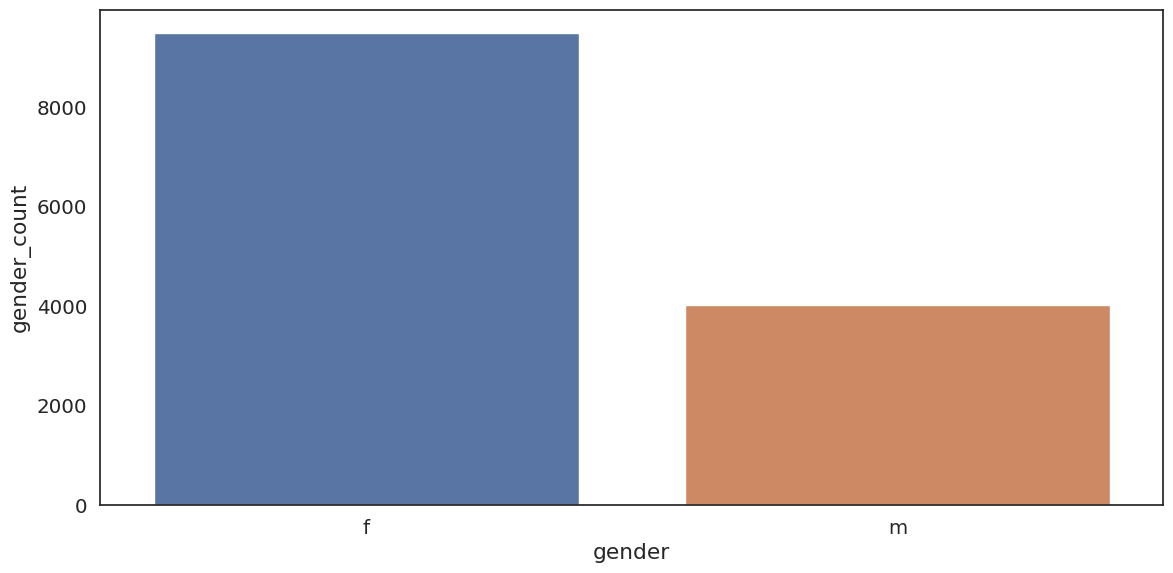

In [ ]:
sns.set(font_scale=1.3)
sns.set_style("white")

df_gender1 = df_usr.groupby(['gender'])['user_id'].count().reset_index(name='gender_count')
fig, axes = plt.subplots(figsize=(12, 6))
sns.barplot( data = df_gender1, x="gender", y="gender_count")
fig.tight_layout()
plt.show()

### Top Visited Pages

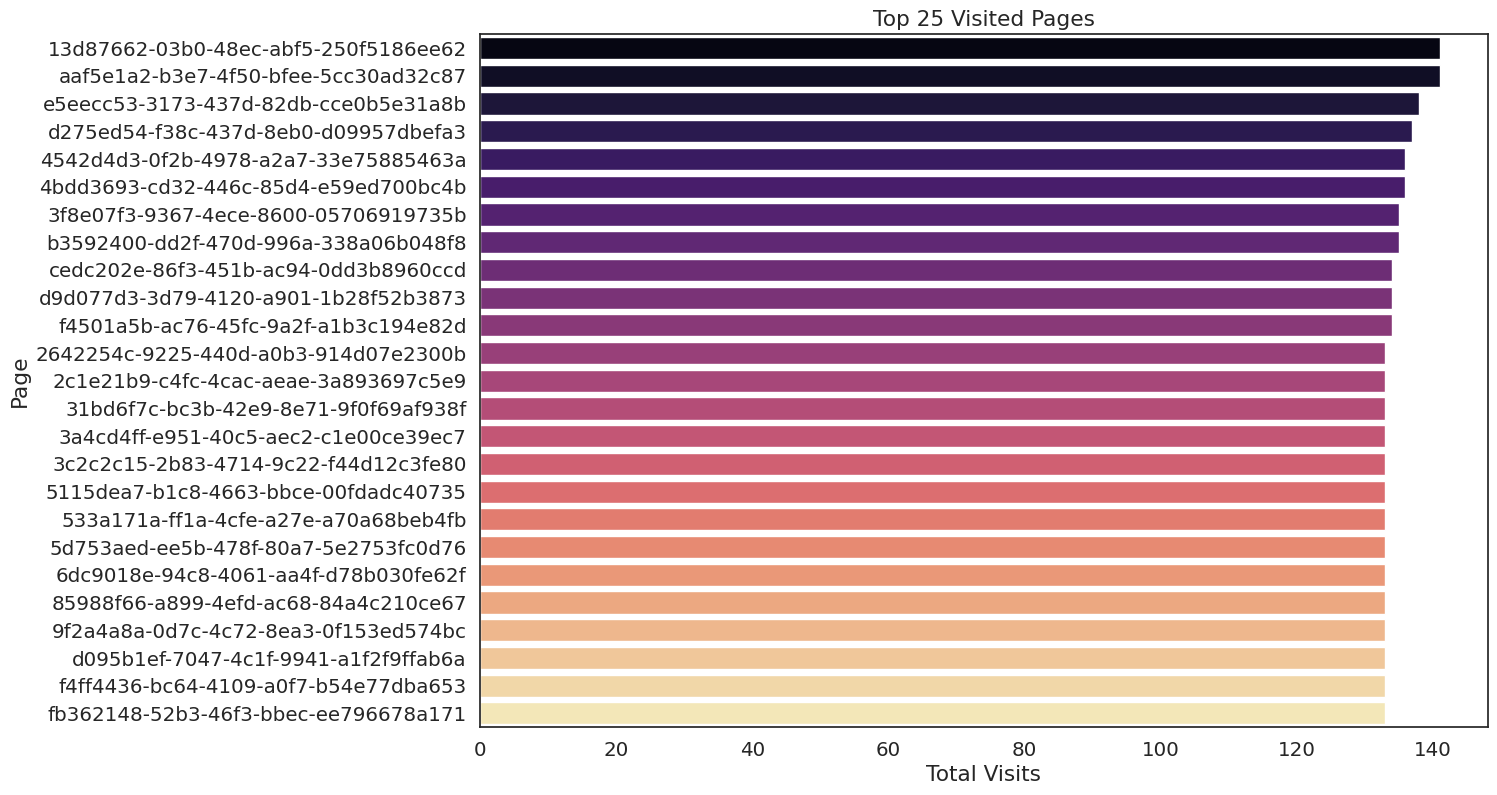

In [ ]:
df_g= df_new.copy()

df_vis = df_g.groupby(['path'])['visit_time'].count().reset_index(name='path_total_visits')
df_quan_top15 = df_vis.nlargest(25, 'path_total_visits')
plt.figure(figsize=(13, 9))
sns.barplot(data=df_quan_top15, x="path_total_visits", y="path", capsize=1, palette="magma")
plt.title("Top 25 Visited Pages")
plt.xlabel("Total Visits")
plt.ylabel("Page")
plt.show()

### Daily Visit Behavior in a Month by all Users

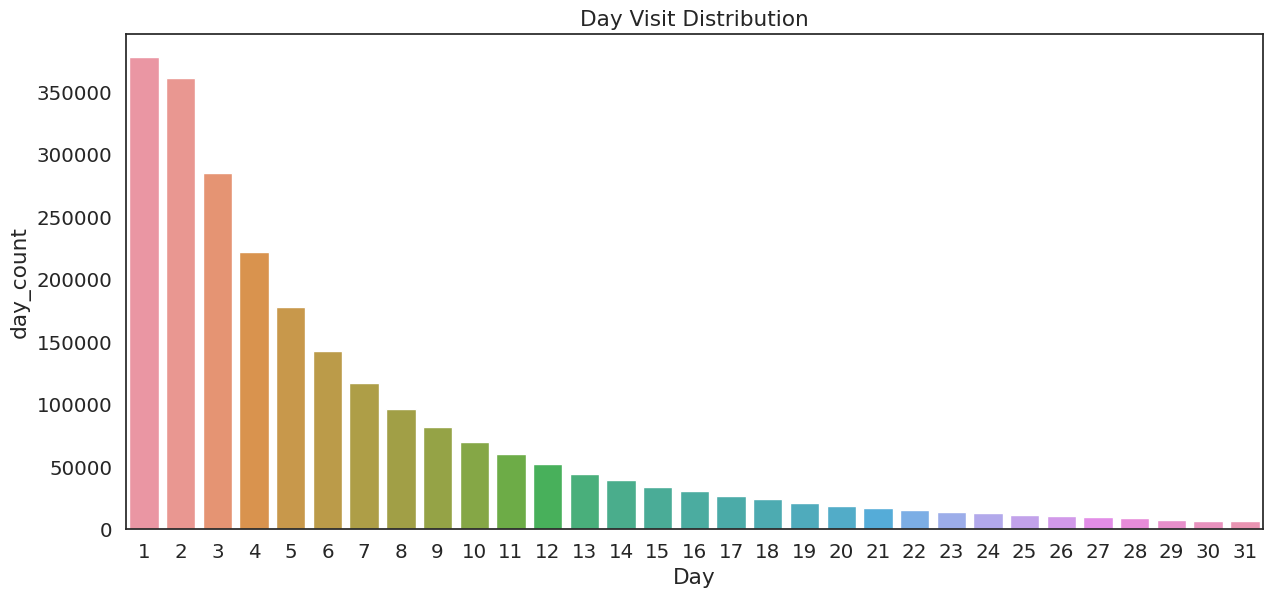

In [ ]:
df_day = df_new.groupby(['Day'])['visit_time'].count().reset_index(name='day_count')
fig, axes = plt.subplots(figsize=(13, 6))
sns.barplot( data = df_day, x="Day", y="day_count")
fig.tight_layout()
plt.title("Day Visit Distribution")
fig.savefig("d.png")
plt.show()

### Daily Visit Behavior in a Week by all Users

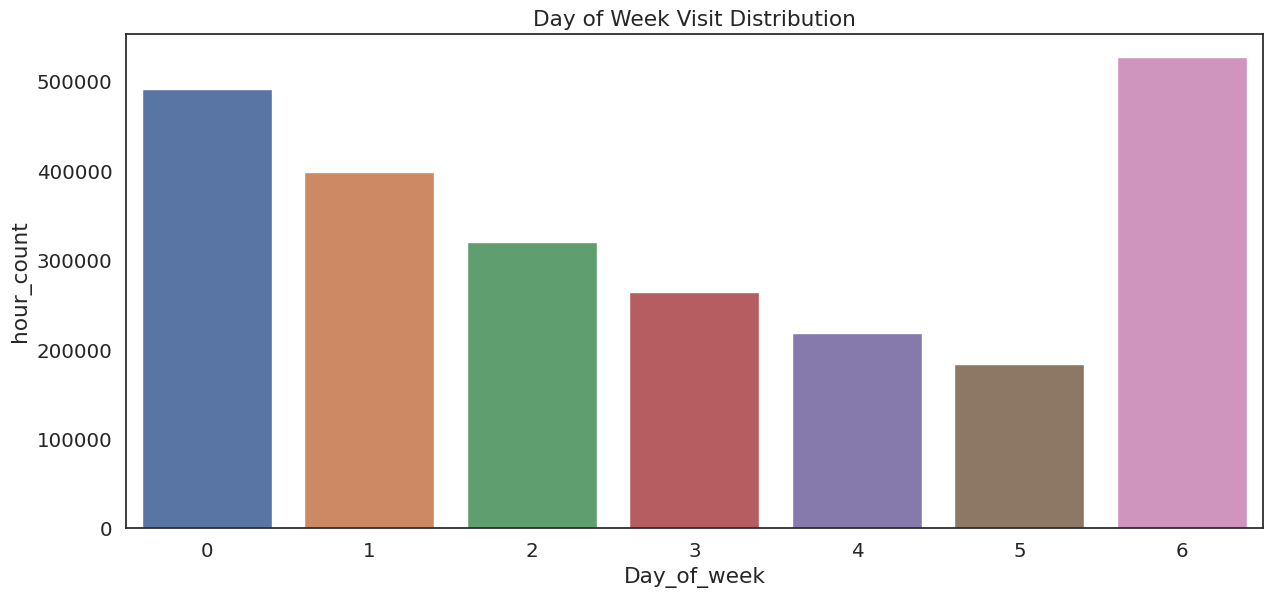

In [ ]:
df_h = df_new.groupby(['Day_of_week'])['visit_time'].count().reset_index(name='hour_count')
fig, axes = plt.subplots(figsize=(13, 6))
sns.barplot( data = df_h, x="Day_of_week", y="hour_count")
fig.tight_layout()
plt.title("Day of Week Visit Distribution")
fig.savefig("h.png")
plt.show()

### Hourly Visit Behavior in a Day by all Users

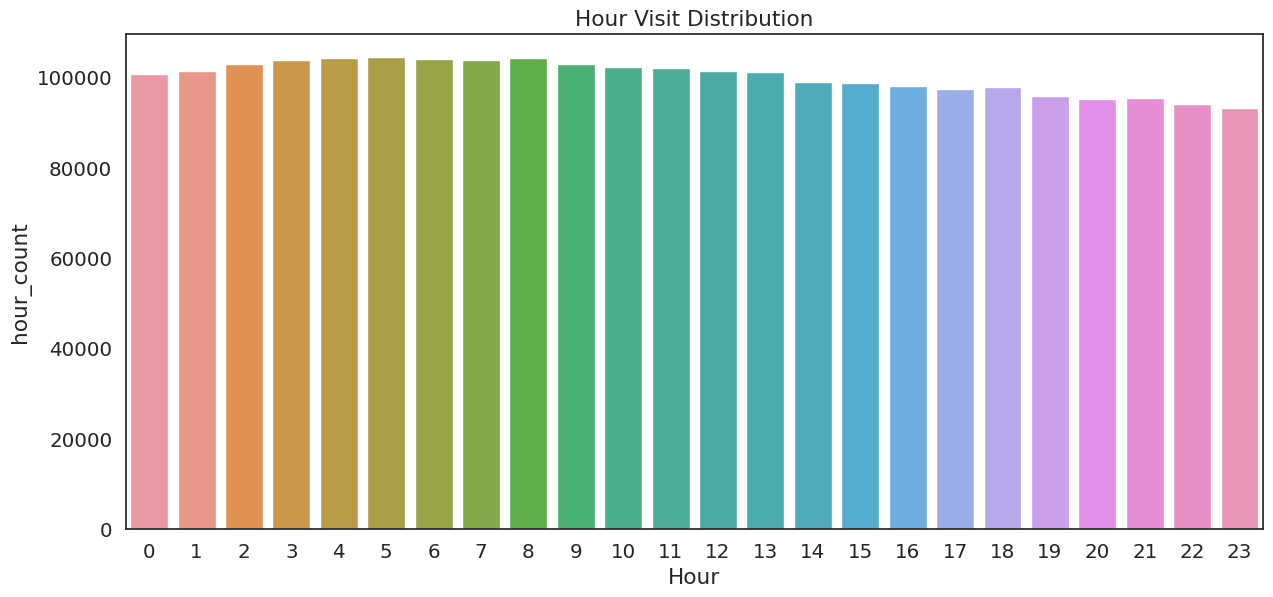

In [ ]:
df_h = df_new.groupby(['Hour'])['visit_time'].count().reset_index(name='hour_count')
fig, axes = plt.subplots(figsize=(13, 6))
sns.barplot( data = df_h, x="Hour", y="hour_count")
fig.tight_layout()
plt.title("Hour Visit Distribution")
plt.show()

### Typical Day of Week by all Users

<Axes: >

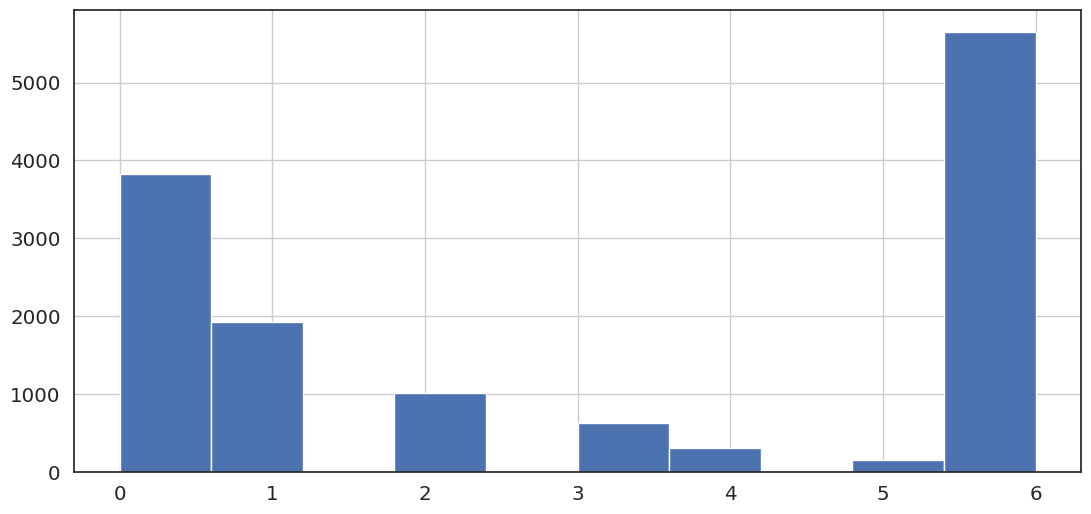

In [ ]:
df_behave = pd.DataFrame()

df_behave['typical_weekday'] = df_new.groupby('user_id')['visit_time'].apply(lambda x: x.dt.weekday.value_counts().idxmax())


sns.set_style("white")
fig, axes = plt.subplots(figsize=(13, 6))
df_behave['typical_weekday'].hist()


### Typical Hour of Visit by all Users

<Axes: >

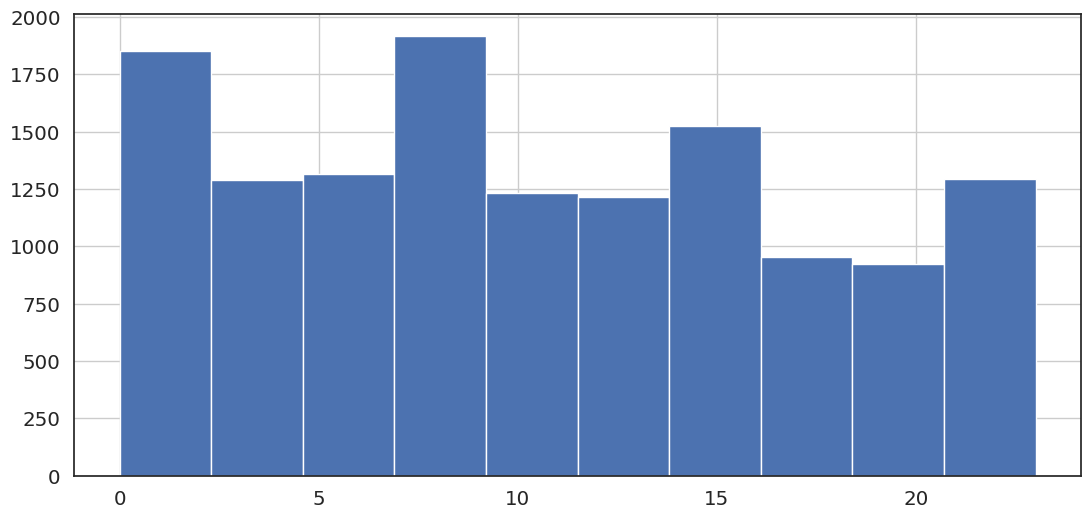

In [ ]:
df_behave['typical_hour'] = df_new.groupby('user_id')['visit_time'].apply(lambda x: x.dt.hour.value_counts().idxmax())

sns.set_style("white")
fig, axes = plt.subplots(figsize=(13, 6))
df_behave['typical_hour'].hist()

### Finding Sequence of Pages for each User

In [ ]:
df_usr_vis = df_new.groupby(['user_id', 'gender'])['visit_time'].count().reset_index(name='user_visits')
df_seq = df_new.groupby('user_id')['path'].apply(list).reset_index(name='visited_pages')

df_bhv= pd.merge(df_usr_vis, df_behave, on='user_id')
df_feat= pd.merge(df_bhv, df_seq, on='user_id')

df_feat

,user_id,gender,user_visits,typical_weekday,typical_hour,visited_pages
0,000338f6-ed25-4bfb-b50b-ecbfd0079aac,f,95,1,15,"[659955ec-d96c-4396-bddb-03c05d6ab396, 8c0e735..."
1,00040476-3bef-4420-b3de-e215509b1ce5,f,75,0,0,"[cbda466e-80b6-425e-869d-2e59b609bd60, 93d9960..."
2,0018a8cf-52a6-4da2-83aa-0dbaff492ab6,f,571,0,3,"[0b8bd7f9-34fc-4610-a07d-43233f6c900f, 119cd49..."
3,001d5322-dade-4655-af2c-29c56f8d006a,f,160,1,11,"[5239965a-b72b-40b0-abcd-8b30907f6822, b9e1f6f..."
4,001df9bb-0b7e-4bc7-954a-912f63106661,f,87,0,17,"[47f2c248-08da-49e7-8114-eeda8f040f0d, ca5aee7..."
...,...,...,...,...,...,...
13508,ffe8097a-029b-4db3-ae72-c73918de27e5,f,148,0,1,"[f1d2ea43-1a2b-42f3-b2d6-9c7acc059404, 63cc488..."
13509,ffead08d-f1fa-4eae-87ae-d39bef9d1773,f,632,4,18,"[039eb15c-5ccc-4e99-9ae5-239def153573, 1b1b014..."
13510,fff8492b-ec55-4d5e-800d-ff33ad81b389,f,27,6,13,"[6a3d2bc2-7ed3-45df-8ccc-6cf520450d6f, d4610e9..."
13511,fffc2569-b749-4b34-af2c-356c7b222b73,m,61,0,13,"[dc158e38-a03a-4f2e-b33b-9869b73138fa, 042e4f9..."


### Number of Male and Female Visits on each Page

In [ ]:
df_w = df_new.groupby(['path', 'gender'])['visit_time'].count().reset_index(name='num_visits')

df_w.head(8)

,path,gender,num_visits
0,00008484-081a-4bb5-99ce-eeed599df25e,f,20
1,00008484-081a-4bb5-99ce-eeed599df25e,m,39
2,00034084-3c84-4827-9154-25a047519fe8,f,23
3,00034084-3c84-4827-9154-25a047519fe8,m,47
4,0003694d-eaeb-45da-9835-4e4e0926b715,f,98
5,0003694d-eaeb-45da-9835-4e4e0926b715,m,4
6,00037a56-6232-4648-b1ae-3b7423319c74,f,21
7,00037a56-6232-4648-b1ae-3b7423319c74,m,67


### Women Page Visit Distribution

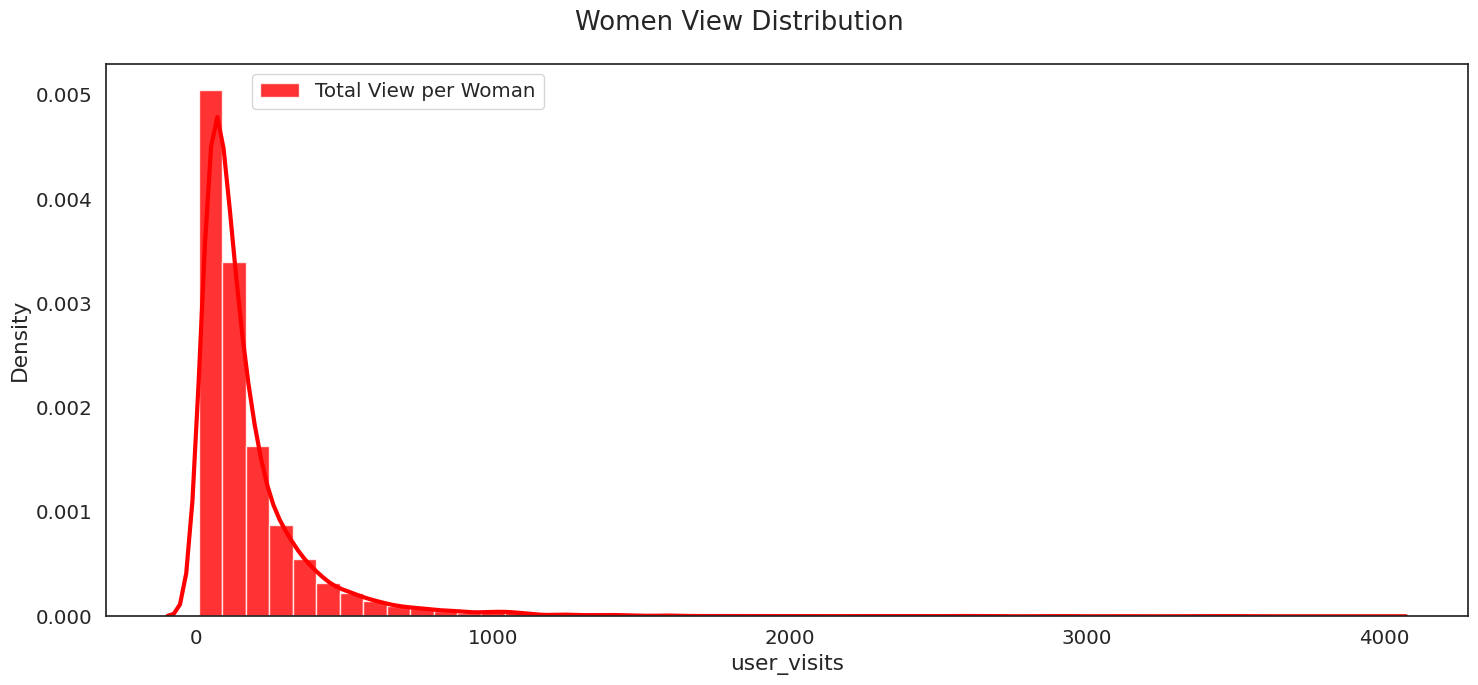

In [ ]:
sns.set_style("white")
kwargs = dict(hist_kws={'alpha':.8}, kde_kws={'linewidth':3})

df_vis_women= df_bhv[df_bhv['gender']=='f']

fig, axes = plt.subplots(figsize=(15, 7))
fig.suptitle('Women View Distribution')
plot1= sns.distplot(df_vis_women['user_visits'] , color="red", label="Total View per Woman" , **kwargs)
plot1.legend( loc = 2, bbox_to_anchor = (0.1,1))
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
plt.rc('patch', edgecolor = 'dimgray', linewidth=1)
fig.tight_layout()
plt.show()

### Men Page Visit Distribution

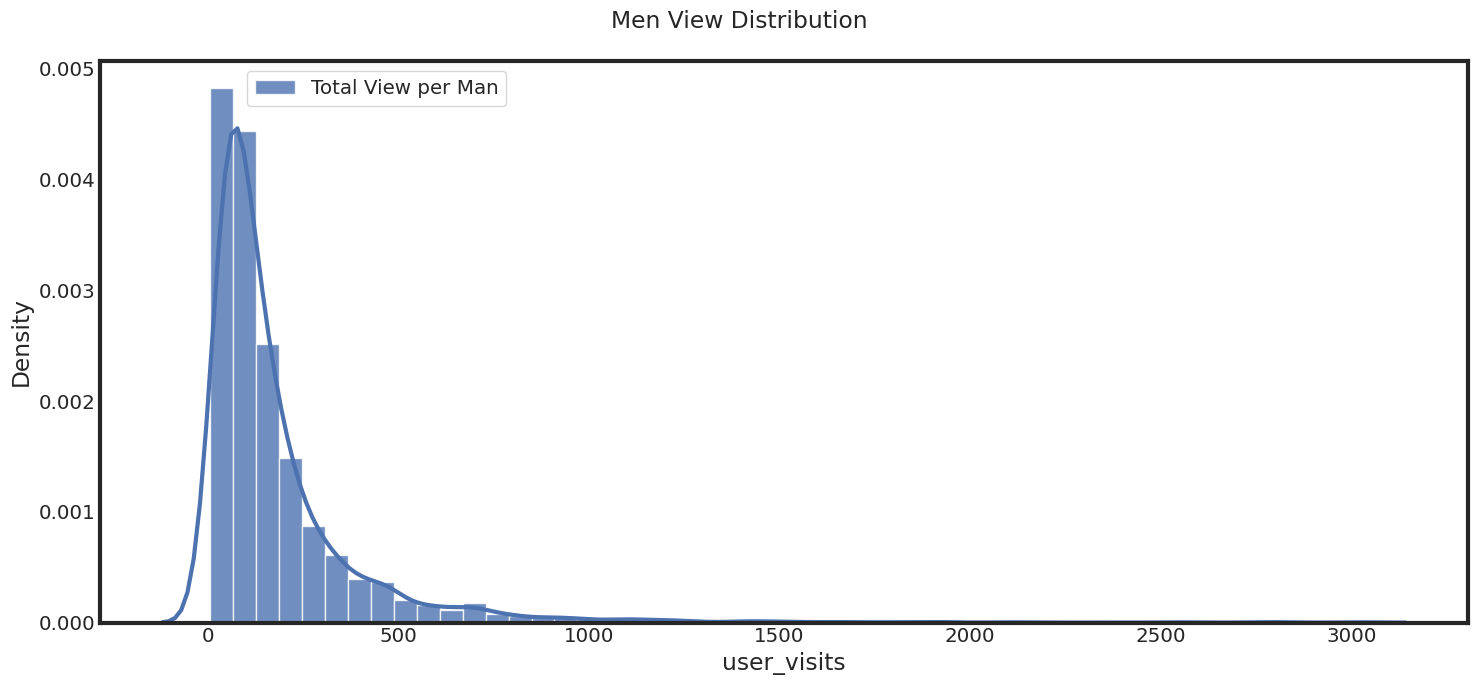

In [ ]:
sns.set_style("white")
kwargs = dict(hist_kws={'alpha':.8}, kde_kws={'linewidth':3})

df_vis_men= df_bhv[df_bhv['gender']=='m']

fig, axes = plt.subplots(figsize=(15, 7))
fig.suptitle('Men View Distribution')
plot1= sns.distplot(df_vis_men['user_visits'] , color="b", label="Total View per Man" , **kwargs)
plot1.legend( loc = 2, bbox_to_anchor = (0.1,1))
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
plt.rc('patch', edgecolor = 'dimgray', linewidth=1)
fig.tight_layout()
plt.show()

### Page Visit in Total

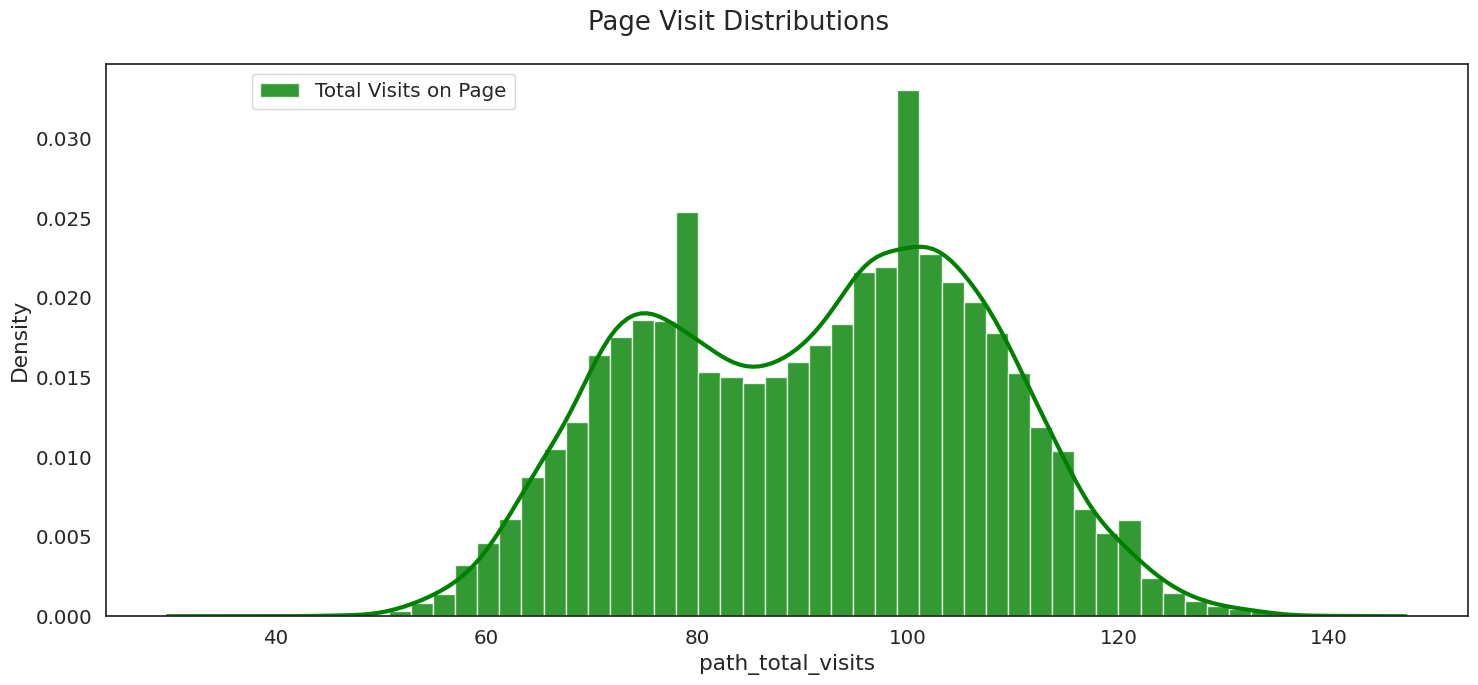

In [ ]:
sns.set(font_scale=1.3)
sns.set_style("white")
kwargs = dict(hist_kws={'alpha':.8}, kde_kws={'linewidth':3})

fig, axes = plt.subplots(figsize=(15, 7))
fig.suptitle('Page Visit Distributions')
plot1= sns.distplot(df_vis['path_total_visits'] , color="green", label="Total Visits on Page" , **kwargs)
plot1.legend( loc = 2, bbox_to_anchor = (0.1,1))
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')

plt.rc('patch', edgecolor = 'dimgray', linewidth=1)
fig.tight_layout()
plt.show()

# Classification

### Applying TFIDF to Encode Sequence of Pages

TF-IDF (term frequency-inverse document frequency) is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. The higher the score, the more relevant that word is in that particular document. Here instead of text, we have sequence of visited pages. We treate sequences like sentences and apply TF-IDF.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

def joiner(list_seq):
    joint= ' '.join(list_seq)
    return joint


tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000)
tfidf = tfidf_vectorizer.fit_transform(df_feat['visited_pages'].apply(lambda x: joiner(x)))

tfidf_arr= tfidf.todense()

df_tf=pd.DataFrame(data=tfidf_arr[0:,0:],
            index=[i for i in range(tfidf_arr.shape[0])],
            columns=['f'+str(i) for i in range(tfidf_arr.shape[1])])


df_fit= df_feat.copy()

df_fit.drop(columns='visited_pages', inplace=True)

df_tfidf= pd.concat([df_fit, df_tf], axis=1)

df_tfidf.head(8)

,user_id,gender,user_visits,typical_weekday,typical_hour,f0,f1,f2,f3,f4,...,f990,f991,f992,f993,f994,f995,f996,f997,f998,f999
0,000338f6-ed25-4bfb-b50b-ecbfd0079aac,f,95,1,15,0.000000,0.0,0.0,0.0,0.0,...,0.146829,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
1,00040476-3bef-4420-b3de-e215509b1ce5,f,75,0,0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
2,0018a8cf-52a6-4da2-83aa-0dbaff492ab6,f,571,0,3,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
3,001d5322-dade-4655-af2c-29c56f8d006a,f,160,1,11,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.12309,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
4,001df9bb-0b7e-4bc7-954a-912f63106661,f,87,0,17,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
5,001f1331-11e5-4846-92c4-91b720c66b76,m,149,4,11,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.116937,0.000000,0.0,0.0,0.0,0.0,0.000000
6,002102b7-8a3a-42d7-adf8-ee83dd7c5a71,f,342,0,6,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.084133,0.081119,0.0,0.0,0.0,0.0,0.000000
7,00271e67-4437-48bf-b1ff-cc1a52e8efa1,m,67,6,1,0.221133,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.223416


### Applying Count Vectorizer to Encode Sequence of Pages

Count Vectorization involves counting the number of occurrences each words appears in a document. We employ the same strategy here on sequence of pags and count the  occurrences.

In [ ]:
count_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000)

count_vec = count_vectorizer.fit_transform(df_feat['visited_pages'].apply(lambda x: joiner(x)))

co_arr= count_vec.todense()

df_co=pd.DataFrame(data=co_arr[0:,0:],
            index=[i for i in range(co_arr.shape[0])],
            columns=['f'+str(i) for i in range(co_arr.shape[1])])


df_count= pd.concat([df_fit, df_co], axis=1)

df_count.head(8)

,user_id,gender,user_visits,typical_weekday,typical_hour,f0,f1,f2,f3,f4,...,f990,f991,f992,f993,f994,f995,f996,f997,f998,f999
0,000338f6-ed25-4bfb-b50b-ecbfd0079aac,f,95,1,15,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,00040476-3bef-4420-b3de-e215509b1ce5,f,75,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0018a8cf-52a6-4da2-83aa-0dbaff492ab6,f,571,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,001d5322-dade-4655-af2c-29c56f8d006a,f,160,1,11,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,001df9bb-0b7e-4bc7-954a-912f63106661,f,87,0,17,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,001f1331-11e5-4846-92c4-91b720c66b76,m,149,4,11,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,002102b7-8a3a-42d7-adf8-ee83dd7c5a71,f,342,0,6,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
7,00271e67-4437-48bf-b1ff-cc1a52e8efa1,m,67,6,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
y_tfidf= df_tfidf['gender']
df_tfidf.drop(columns=['gender', 'user_id'], inplace=True)
X_tfidf= df_tfidf.apply(pd.to_numeric)
X_tfidf.shape

(13513, 1003)

In [ ]:
y_count= df_count['gender']
df_count.drop(columns=['gender', 'user_id'], inplace=True)
X_count= df_count.apply(pd.to_numeric)
X_count.shape

(13513, 1003)

### Binary Classification Models along with K-fold Cross Validation

In [ ]:
def precision_scorer(estimator, x, y):
    yPred = estimator.predict(x)
    return    precision_score(y, yPred, average='micro')


def recall_scorer(estimator, x, y):
    yPred = estimator.predict(x)
    return    recall_score(y, yPred, average='micro')

def sensitivity_scorer(estimator, x, y):
    yPred = estimator.predict(x)
    return    sensitivity_score(y, yPred, average='micro')

def evaluate_model(X, y, model):

   cval = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)

   acc_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cval, n_jobs=-1)
   f_scores= cross_val_score(model, X, y, scoring='f1_micro', cv=cval, n_jobs=-1)
   auc_scores= cross_val_score(model, X, y, scoring='roc_auc', cv=cval, n_jobs=-1)
   rec_scores= cross_val_score(model, X, y, scoring= recall_scorer, cv=cval, n_jobs=-1)
   pre_scores= cross_val_score(model, X, y, scoring= precision_scorer, cv=cval, n_jobs=-1)
   sens_scores= cross_val_score(model, X, y, scoring= sensitivity_scorer, cv=cval, n_jobs=-1)

   return acc_scores,f_scores, auc_scores, rec_scores, pre_scores, sens_scores


def clf_models():

    models, names = list(), list()

    models.append(DummyClassifier(strategy='uniform'))
    names.append('DuM')

    models.append(LogisticRegression(C= 1))
    names.append('LR ')

    models.append(GaussianNB())
    names.append('NB ')

    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')

    models.append(LinearSVC())
    names.append('SVM')

    models.append(DecisionTreeClassifier(random_state=0))
    names.append('DT ')

    models.append(RandomForestClassifier(max_depth=3, random_state=0) )
    names.append('RNDF')

    return models, names


models, names = clf_models()


acc_collect=[]

for i in range(len(names)):
   steps = [('o', SMOTE(k_neighbors=2)), ('m', models[i])]

   pipeline = Pipeline(steps=steps)

   acc_vals ,f_vals, auc_vals, rec_vals, pre_vals , sens_vals= evaluate_model(X_tfidf ,y_tfidf, pipeline)

   print('====> %s  Accuracy: %.4f (std %.4f)   Precision: %.4f    Recall: %.4f    F1: %.4f   Sensitivity: %.4f    AUC: %.4f  ' %
         (names[i], np.mean(acc_vals), np.std(acc_vals), np.mean(pre_vals), np.mean(rec_vals), np.mean(f_vals), np.mean(sens_vals), np.mean(auc_vals)))

   acc_collect.append(list(acc_vals))


====> DuM  Accuracy: 0.4976 (std 0.0088)   Precision: 0.5023    Recall: 0.5016    F1: 0.5008   Sensitivity: 0.5045    AUC: 0.5000  
====> LR   Accuracy: 0.9025 (std 0.0023)   Precision: 0.8999    Recall: 0.9022    F1: 0.9019   Sensitivity: 0.9019    AUC: 0.9643  
====> NB   Accuracy: 0.9013 (std 0.0036)   Precision: 0.9040    Recall: 0.9036    F1: 0.9038   Sensitivity: 0.9040    AUC: 0.9425  
====> LDA  Accuracy: 0.8878 (std 0.0039)   Precision: 0.8865    Recall: 0.8861    F1: 0.8859   Sensitivity: 0.8854    AUC: 0.9547  
====> SVM  Accuracy: 0.7816 (std 0.0821)   Precision: 0.7339    Recall: 0.6400    F1: 0.7589   Sensitivity: 0.7234    AUC: 0.8858  
====> DT   Accuracy: 0.6806 (std 0.0106)   Precision: 0.6785    Recall: 0.6751    F1: 0.6752   Sensitivity: 0.6827    AUC: 0.6242  
====> RNDF  Accuracy: 0.7647 (std 0.0143)   Precision: 0.7647    Recall: 0.7622    F1: 0.7659   Sensitivity: 0.7669    AUC: 0.7864  


It can be seen that LR, NB and LDA consistently outperform the others.

The results are reported on the following metrics:

- Accuracy is the proprtion of correct predictions to the total predictions:

            Accuracy = TP + TN/ (TP + TN + FP + FN)


- Precision summarizes the fraction of examples assigned the positive class that belong to the positive class:

            Precision = TP / (TP + FP)

-  Recall summarizes how well the positive class was predicted:

            Recall = TP/ (TP + FN)

-  F-Measure and Sensitivty consider the false classified items in the negative class. In an imbalanced setting, the low FN indicates that the classifier predicts the majority of the nagative points correctly. That means the the true negative rate is also high.  

           F-Measure = TP / (TP + 1/2 (FP + FN))

           Sensitivity = TP / (TP + FN)

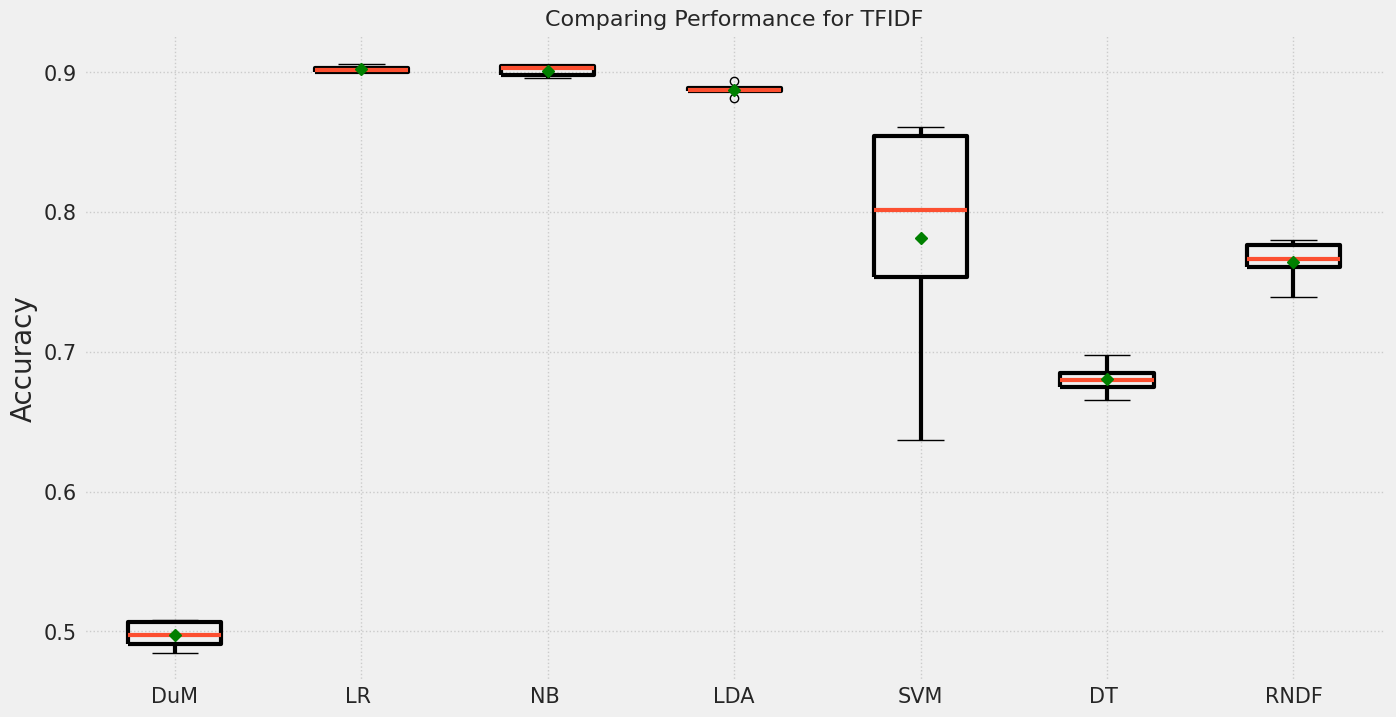

In [ ]:
fig = plt.figure()
fig.set_size_inches(15, 8)
plt.ylabel('Accuracy', fontsize=20)


medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick')
flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  linestyle='none')
whiskerprops = dict(linewidth=3, color='black')

meanpointprops = dict(marker='D', markeredgecolor='green',
                      markerfacecolor='green')

plt.boxplot(acc_collect ,labels= names, showmeans=True, whiskerprops=whiskerprops, boxprops=whiskerprops,
                                                       meanprops=meanpointprops,  medianprops={"linewidth": 3,  "solid_capstyle": "butt"})


plt.grid(visible=True, linestyle=':')
plt.tick_params(axis='both',labelsize=15)
plt.title('Comparing Performance for TFIDF', fontsize="16")
fig.savefig('boxplt_acc.png')

In [ ]:
acc_collect=[]

for i in range(len(names)):
   steps = [('o', SMOTE(k_neighbors=2)), ('m', models[i])]

   pipeline = Pipeline(steps=steps)

   acc_vals ,f_vals, auc_vals, rec_vals, pre_vals , sens_vals= evaluate_model(X_count ,y_count, pipeline)

   print('====> %s  Accuracy: %.4f (std %.4f)   Precision: %.4f    Recall: %.4f    F1: %.4f   Sensitivity: %.4f    AUC: %.4f  ' %
         (names[i], np.mean(acc_vals), np.std(acc_vals), np.mean(pre_vals), np.mean(rec_vals), np.mean(f_vals), np.mean(sens_vals), np.mean(auc_vals)))

   acc_collect.append(list(acc_vals) )


====> DuM  Accuracy: 0.5046 (std 0.0054)   Precision: 0.5060    Recall: 0.5026    F1: 0.5009   Sensitivity: 0.4975    AUC: 0.5000  
====> LR   Accuracy: 0.9018 (std 0.0048)   Precision: 0.9023    Recall: 0.9008    F1: 0.9015   Sensitivity: 0.9009    AUC: 0.9640  
====> NB   Accuracy: 0.5827 (std 0.0128)   Precision: 0.5831    Recall: 0.5843    F1: 0.5827   Sensitivity: 0.5837    AUC: 0.6180  
====> LDA  Accuracy: 0.8007 (std 0.0077)   Precision: 0.8039    Recall: 0.8019    F1: 0.7999   Sensitivity: 0.8003    AUC: 0.8830  
====> SVM  Accuracy: 0.8538 (std 0.0389)   Precision: 0.8691    Recall: 0.8571    F1: 0.8345   Sensitivity: 0.8721    AUC: 0.9395  
====> DT   Accuracy: 0.6991 (std 0.0090)   Precision: 0.6900    Recall: 0.6891    F1: 0.6981   Sensitivity: 0.6956    AUC: 0.6399  
====> RNDF  Accuracy: 0.6432 (std 0.0130)   Precision: 0.6445    Recall: 0.6437    F1: 0.6466   Sensitivity: 0.6438    AUC: 0.7443  


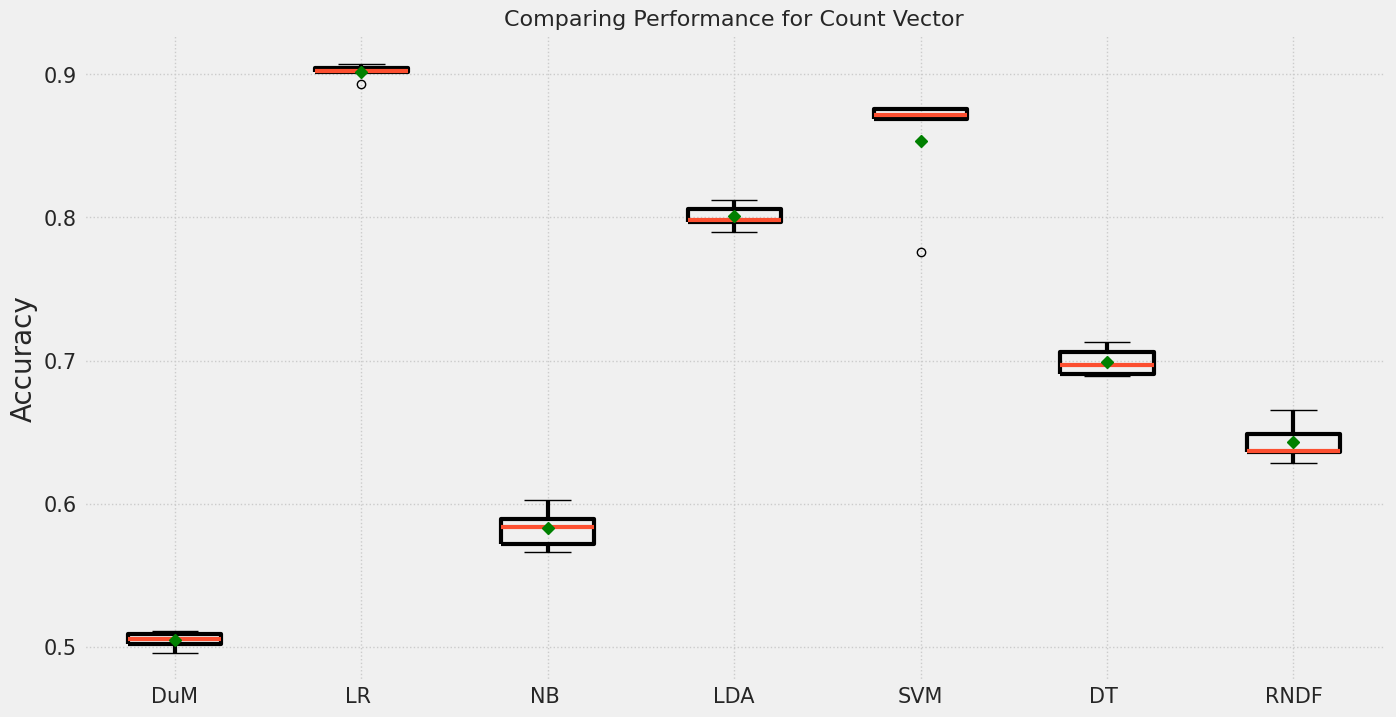

In [ ]:
fig = plt.figure()
fig.set_size_inches(15, 8)
plt.ylabel('Accuracy', fontsize=20)

medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick')
flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  linestyle='none')
whiskerprops = dict(linewidth=3, color='black')

meanpointprops = dict(marker='D', markeredgecolor='green',
                      markerfacecolor='green')

plt.boxplot(acc_collect, labels=names, showmeans=True, whiskerprops=whiskerprops, boxprops=whiskerprops,
             meanprops=meanpointprops,
            medianprops={"linewidth": 3,  "solid_capstyle": "butt"})


plt.grid(visible=True, linestyle=':')
plt.title('Comparing Performance for Count Vector', fontsize="16")
plt.tick_params(axis='both',labelsize=15)
fig.savefig('boxplt_acc.png')

## Test Prediction



### Loading Test Data

In [ ]:
df_test = pd.read_csv('/content/gdrive/MyDrive/test.csv', encoding="ISO-8859-1")
df_test

,user_id,path,timestamp
0,de92cc8b-1ed7-4202-8668-578725a10113,e13c63dd-6f62-4f5c-b820-1679f6b8a198,2017-01-01T00:02:47
1,ba69fc0c-f5b6-4c0d-93d5-56077dabf7d9,0dc2e2ca-e30d-4036-b8e5-4440b7ab73d2,2017-01-01T00:07:57
2,6f74c592-2054-4b18-ac42-632bdb7ebae1,26525cd7-b6f3-4cb5-be6a-b98c4a276de2,2017-01-01T00:08:04
3,6f74c592-2054-4b18-ac42-632bdb7ebae1,a4c3f4da-2506-47b9-8701-e0bdadc7ecb3,2017-01-01T00:08:14
4,0f0567ba-ccb5-4a90-828a-f4f41a18fbf6,fd6f782f-d569-46a0-8c9f-4404578a4611,2017-01-01T00:08:49
...,...,...,...
275835,a69f9ba6-9e50-4844-93c7-6b8e1cbcfa0d,0624faba-f197-4f36-81ae-38854c41d4b1,2017-04-20T04:31:18
275836,a69f9ba6-9e50-4844-93c7-6b8e1cbcfa0d,3b161b76-6ff2-4b23-80e9-d130f93e43f5,2017-04-20T04:31:23
275837,a69f9ba6-9e50-4844-93c7-6b8e1cbcfa0d,4517d9b1-018c-4427-b7ea-ed05ac158ac1,2017-04-20T05:50:02
275838,a69f9ba6-9e50-4844-93c7-6b8e1cbcfa0d,f4c304a2-6fdc-47e2-81df-c57dfd28a474,2017-04-20T07:34:22


### Feature Engineering on Test Data

In [ ]:
df_test_behave = pd.DataFrame()
df_test['visit_time'] = pd.to_datetime(df_test['timestamp'])
df_test_behave['typical_weekday'] = df_test.groupby('user_id')['visit_time'].apply(lambda x: x.dt.weekday.value_counts().idxmax())
df_test_behave['typical_hour'] = df_test.groupby('user_id')['visit_time'].apply(lambda x: x.dt.hour.value_counts().idxmax())


In [ ]:

df_test_vis = df_test.groupby(['user_id'])['visit_time'].count().reset_index(name='user_visits')
df_test_seq = df_test.groupby('user_id')['path'].apply(list).reset_index(name='visited_pages')
df_test_bhv= pd.merge(df_test_vis, df_test_behave, on='user_id')
df_test_feat= pd.merge(df_test_bhv, df_test_seq, on='user_id')

df_test_feat

,user_id,user_visits,typical_weekday,typical_hour,visited_pages
0,00122071-ddb4-4411-8c23-c7fee8072d0f,202,3,9,"[4b549d55-c156-4fd8-b9a6-7621f71abebc, 60f8948..."
1,0013cfdf-b3fa-4c75-800a-b08f548ae9f1,797,1,9,"[25dd0097-102a-4843-8ada-1e46461ec4fa, c28f54c..."
2,00358796-31c0-4c4f-ab11-8a989a526ba8,171,3,21,"[2732f708-207a-41fe-bf87-e7cb8422169c, 30a54ad..."
3,008d7ff3-4fd2-4185-80e8-4cea9a97d497,21,6,7,"[dde01068-309f-47b9-9dfc-07943121fd8a, a023bd7..."
4,00a0533c-02dd-4b46-8f46-0608aa34e2e8,266,6,21,"[327528a0-6b73-401a-b642-80c77cb603e6, 7c65c8a..."
...,...,...,...,...,...
1482,ff925273-48c4-417f-bf54-5baf32ed8199,481,0,0,"[6d06e26e-f9a9-4efd-93eb-79ed8d696563, 0ebc20e..."
1483,ff93dcea-7f42-410b-b805-af178d8bc461,31,6,20,"[bde1ecaf-c38c-46b7-a5aa-c409b8ee0919, a5b6f9b..."
1484,ffc70334-7ffc-4d5b-9dc8-36a88a40d023,101,1,10,"[b68f9cdc-497e-4557-b621-2e9ea0274228, 0c8eeb3..."
1485,ffe0e2e2-b68c-47ea-b2bd-7df594f81b00,87,0,23,"[21201791-b963-4606-b33e-ec0a6c14e411, 71e7e7d..."


In [ ]:
tfidf_test= tfidf_vectorizer.fit_transform(df_test_feat['visited_pages'].apply(lambda x: joiner(x)))

tfidf_test= tfidf_test.todense()

df_test_tf=pd.DataFrame(data= tfidf_test[0:,0:],
            index=[i for i in range(tfidf_test.shape[0])],
            columns=['f'+str(i) for i in range(tfidf_test.shape[1])])


df_test_ftr= df_test_feat.copy()

df_test_ftr.drop(columns='visited_pages', inplace=True)

df_test_tfidf= pd.concat([df_test_ftr, df_test_tf], axis=1)

df_test_original= df_test_tfidf.copy()

df_test_tfidf

,user_id,user_visits,typical_weekday,typical_hour,f0,f1,f2,f3,f4,f5,...,f990,f991,f992,f993,f994,f995,f996,f997,f998,f999
0,00122071-ddb4-4411-8c23-c7fee8072d0f,202,3,9,0.000000,0.0,0.000000,0.0,0.103318,0.0,...,0.0,0.104532,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0013cfdf-b3fa-4c75-800a-b08f548ae9f1,797,1,9,0.047311,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.049692,0.0,0.0,0.050134,0.0,0.0
2,00358796-31c0-4c4f-ab11-8a989a526ba8,171,3,21,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
3,008d7ff3-4fd2-4185-80e8-4cea9a97d497,21,6,7,0.000000,0.0,0.331927,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
4,00a0533c-02dd-4b46-8f46-0608aa34e2e8,266,6,21,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.094797,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,ff925273-48c4-417f-bf54-5baf32ed8199,481,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.066978,0.000000,0.0,0.0,0.000000,0.0,0.0
1483,ff93dcea-7f42-410b-b805-af178d8bc461,31,6,20,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1484,ffc70334-7ffc-4d5b-9dc8-36a88a40d023,101,1,10,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.140302,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1485,ffe0e2e2-b68c-47ea-b2bd-7df594f81b00,87,0,23,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0


In [ ]:
df_test_tfidf.drop(columns=['user_id'], inplace=True)

### Classification on Test Data

In [ ]:
X_test= df_test_tfidf.apply(pd.to_numeric)

model_LR= LogisticRegression(C= 0.1)
model_NB=GaussianNB()
model_LDA= LinearDiscriminantAnalysis()
model_VOTE = VotingClassifier(estimators=[('lr', model_LR), ('nb', model_NB), ('lda', model_LDA)], voting='soft')


model_LR.fit(X_tfidf, y_tfidf)
model_NB.fit(X_tfidf, y_tfidf)
model_LDA.fit(X_tfidf, y_tfidf)
model_VOTE.fit(X_tfidf, y_tfidf)

pred_LR= model_LR.predict(X_test)
pred_NB= model_NB.predict(X_test)
pred_LDA= model_LDA.predict(X_test)
pred_VOTE= model_VOTE.predict(X_test)

In [ ]:
print(pred_LDA.shape)
stacked= np.stack((pred_LR, pred_NB, pred_LDA, pred_VOTE), axis=0)

pred_array= stacked.T
print(pred_array.shape)


df_pred =pd.DataFrame(data= pred_array[0:,0:] ,  columns=['pred_LR', 'pred_NB', 'pred_LDA', 'Voting'])
df_pred['user_id']= df_test_original['user_id']
df_pred_final=df_pred[['user_id', 'pred_LR', 'pred_NB', 'pred_LDA', 'Voting' ]]

df_pred_final.to_excel('pred_gender.xlsx')
df_pred_final.head(8)

(1487,)
(1487, 4)


,user_id,pred_LR,pred_NB,pred_LDA,Voting
0,00122071-ddb4-4411-8c23-c7fee8072d0f,f,f,f,f
1,0013cfdf-b3fa-4c75-800a-b08f548ae9f1,f,f,m,f
2,00358796-31c0-4c4f-ab11-8a989a526ba8,f,f,f,f
3,008d7ff3-4fd2-4185-80e8-4cea9a97d497,f,f,f,f
4,00a0533c-02dd-4b46-8f46-0608aa34e2e8,f,f,f,f
5,00aff390-230b-4679-b4e6-55856577ea24,f,f,f,f
6,01a9c993-94cb-4202-9ead-75de9db6278e,f,f,f,f
7,01d9bc22-a122-4378-a20c-ea564f1a10a2,f,f,f,f


In [ ]:
df_pred_final['pred_LR'].value_counts()

f    1460
m      27
Name: pred_LR, dtype: int64

In [ ]:
df_pred_final['pred_NB'].value_counts()

f    1108
m     379
Name: pred_NB, dtype: int64

In [ ]:
df_pred_final['pred_LDA'].value_counts()

f    1211
m     276
Name: pred_LDA, dtype: int64

In [ ]:
df_pred_final['Voting'].value_counts()

f    1149
m     338
Name: Voting, dtype: int64

# Recommendation

### Balancing the Data Points based on Gender due to Computation Limits

In [ ]:
df_women= df_feat[df_feat['gender']=='f'].sample(frac=0.5)
df_men= df_feat[df_feat['gender']=='m']

df_merge= pd.concat([df_men, df_women], ignore_index=True)
df_merge = df_merge.sample(frac = 1)

df_merge

,user_id,gender,user_visits,typical_weekday,typical_hour,visited_pages
7813,0ea29eb1-6274-4635-a85c-7ebeeda575fa,f,1171,5,0,"[9e6a7881-816b-49f9-b32a-4e494bdd0fb9, bffd157..."
1084,424059bc-5d64-42f6-8473-e77e8861e8f4,m,35,6,17,"[9a11ba85-c578-41f6-8db7-2c63afee92cf, 410c15c..."
4847,67ce7d2b-63af-4fb7-b3f9-40d199400538,f,522,1,16,"[ba67f6f0-6a6f-4ca7-8605-668ba3bf9c52, 9ead9e6..."
690,298dfb25-c32a-482d-8904-97306fed661e,m,86,6,5,"[d7fad635-e55b-4da8-bc43-3efc69cc483c, 4ed2c32..."
1711,6a1f71f1-cdbf-4cbe-9d4c-10cd86c4aefa,m,42,6,8,"[0a02fd82-d818-4b7d-946f-7e69de8a38cc, d9d0790..."
...,...,...,...,...,...,...
799,30750972-9642-4be8-977e-581e9ad84494,m,684,6,18,"[f50408e0-d9c4-4ec2-a135-f434655ffc7c, 84d37a5..."
5601,6e808550-0c63-4647-9643-e9b553ceb80d,f,30,6,16,"[d882c22a-eb7a-4417-81be-3bbfc29c47d3, d6ad2e3..."
5793,af6f949f-7f0f-4901-832a-b4412caa7aa6,f,149,0,8,"[7d3fe202-aed5-449e-a599-3c8ff052b362, fedc7f9..."
1765,6dbef33a-1255-47a7-8a1b-9b291afb56d7,m,37,6,2,"[408b41e5-8962-475a-9bcc-59e446eebd19, 1a4dfd0..."


In [ ]:
df_merge['gender'].value_counts()

f    4741
m    4031
Name: gender, dtype: int64

In [ ]:
user2id ={}
id2user ={}
user2gender ={}

for i, usr in enumerate(list(set(df_merge["user_id"].values))):
    user2id[usr]=i
    id2user[i]=usr

for usr, gr in list(zip(df_merge.user_id, df_new.gender)):
    user2gender[usr]=gr


### Building an Artificial Corpus by Collecting Sequence of Pages

In [ ]:
from sklearn.model_selection import train_test_split

corpus=[]

for i, row in df_merge.iterrows():

     corpus.append(row['visited_pages'])

all_pages_seq=[val for sublist in corpus for val in sublist]

print('number of users:', len(corpus))
print('length of full sequence:',len(all_pages_seq))
print('number of unique pages:', len(set(all_pages_seq)))

number of users: 8772
length of full sequence: 1569403
number of unique pages: 26394


### Applying Word2Vec to the Sequence of Pages

Word2Vec is a widely used method in natural language processing (NLP) that allows words to be represented as vectors in a continuous vector space.
It consists of a shallow two-layer neural networks having one input layer, one hidden layer, and one output layer. During training it aims to predict the missing word in the context and update the model weights. Indeed, Word2Vec is an effort to map words to high-dimensional vectors to capture the semantic relationships between words. We borrow the same idea and apply the algorithm on the sequences of pages to encode relationships between pages and to learn vectors for them.

In [ ]:
import gensim

corpus= corpus[: 2500] # droping some users due to comupation limits

model_v = gensim.models.Word2Vec(
            corpus,
            vector_size=300, # desired no. of features/independent variables
            window=8, # context window size
            min_count=2, # Ignores all words with total frequency lower than 2.
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 32, # no.of cores
            seed = 34
)

model_v.train(corpus, total_examples= len(corpus), epochs=10)

(4485860, 4485860)

In [ ]:
from gensim.models import KeyedVectors

model_v.wv.save("word2vec_model2.wordvectors")

model_w2v = KeyedVectors.load("word2vec_model2.wordvectors", mmap='r')

In [ ]:
pages = list(model_w2v.index_to_key)

print(len(pages))

26394


#### 2D Page Vector Visualization

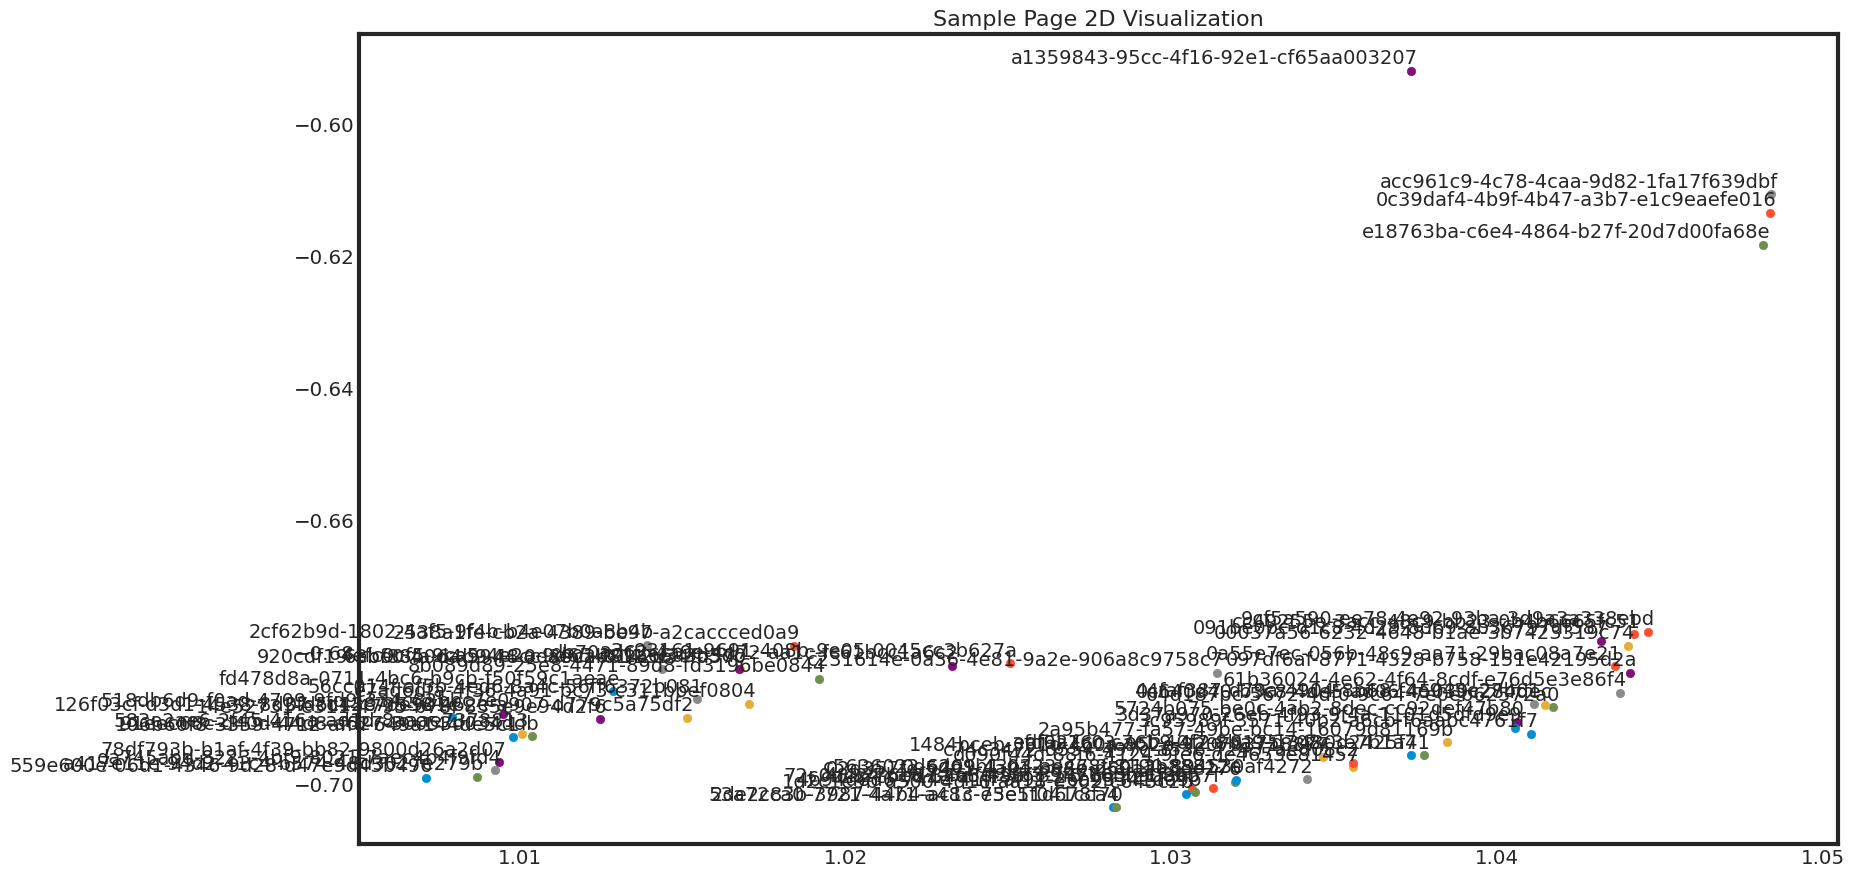

In [ ]:
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')
sns.set_style("white")


def tsne_plot(model, pages, title=None):

    labels = []
    tokens = []

    for p in pages:

        tokens.append(model[p])
        labels.append(p)

    tsne_model = TSNE(perplexity=len(tokens)-1, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(17,10))
    plt.title(title, fontsize="16")
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    #plt.rc('patch', edgecolor = 'dimgray', linewidth=1)

    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')


    plt.show()

tsne_plot( model_w2v, pages [:55], "Sample Page 2D Visualization")

### Pairwaise Cosine Similary Calculation

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

w2v_matrix=[]
page2id={}
id2page={}

for i, p in enumerate(pages):

    w2v_matrix.append(model_w2v[p])
    page2id[p]=i
    id2page[i]=p


w2v_matrix=np.array(w2v_matrix)

cosine_matrix_wv= cosine_similarity(w2v_matrix)

print(cosine_matrix_wv.shape)

(26394, 26394)


Calculating similarity between each page and all other pages and sorting them


In [ ]:
def sim_pages(seq=None, cosine_sim=None, k=5):

    sim_pages=[]

    for page in seq:

        idx = page2id[page]

        sim_scores1 = list(enumerate(cosine_sim[idx]))
        sim_scores2 = sorted(sim_scores1, key=lambda x: x[1], reverse=True)
        sim_pages.extend(sim_scores2 )

    sim_scores = sim_pages[1:k+1]
    p_indices = [i[0] for i in sim_scores]
    page_list=[id2page[i] for i in p_indices]

    return page_list

### Page Recommendations for Random Users in the Test Set

In [ ]:
for user, seq in list(zip(df_test_feat['user_id'], df_test_feat['visited_pages']))[:10]:

    print('USER:', user, ' SEQUENCE LENGTH:', len(seq))

    print('TOP 5 PAGE RECOMMENDATION: ',sim_pages (seq,cosine_matrix_wv , 5),'\n')

USER: 00122071-ddb4-4411-8c23-c7fee8072d0f  SEQUENCE LENGTH: 202
TOP 5 PAGE RECOMMENDATION:  ['255f04f5-f0de-4867-af7c-002fd5b34db4', 'be63bed0-0b04-40aa-9dcf-efea1f0c9ba1', 'e5243ca4-054b-41f5-af52-ae574fbd1609', '2c60b234-162f-4c3c-87f0-4809703459ee', 'b2483533-d8d0-46e5-b081-45466e83d6ed'] 

USER: 0013cfdf-b3fa-4c75-800a-b08f548ae9f1  SEQUENCE LENGTH: 797
TOP 5 PAGE RECOMMENDATION:  ['53b443ca-708b-4fe4-aa51-a24d6d0dc47d', '2f09c2b6-5874-4fb7-90c8-1a0fc3892ae0', 'c2e65232-c3d4-4d6e-a3bd-ca0b511bf5ca', '645f352c-1830-46cf-a2f1-8c2fb97fa79f', '161b535f-6b29-4452-9b62-532cf36f06aa'] 

USER: 00358796-31c0-4c4f-ab11-8a989a526ba8  SEQUENCE LENGTH: 171
TOP 5 PAGE RECOMMENDATION:  ['4d030960-8169-4fc7-8a85-7b9b525a4fc3', 'f803b6a0-d517-45b7-8760-13a2494a9378', '72ff2b5c-c2b8-40d8-9967-d432b7be554e', 'c23ae9fb-7334-43b4-8249-2126ccb91313', '9c755fd8-513e-4739-9b5a-df593e016639'] 

USER: 008d7ff3-4fd2-4185-80e8-4cea9a97d497  SEQUENCE LENGTH: 21
TOP 5 PAGE RECOMMENDATION:  ['921290d8-02b2-418f